In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('sales.csv')
df

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


In [3]:
df.isnull().sum()

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [4]:
df.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [5]:
def clean_data(df):
    df = df.drop(df.columns[0], axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.strftime('%Y')
    df['month'] = df['date'].dt.strftime('%m')
    df['day'] = df['date'].dt.strftime('%d')
    df['year'] = pd.to_numeric(df['year'])
    df['month'] = pd.to_numeric(df['month'])
    df['day'] = pd.to_numeric(df['day'])
    df['week'] = df['date'].dt.isocalendar().week
    df['month'] = df['date'].dt.month
    bins = [0, 8, 16, 24, 32]
    labels = [1, 2, 3, 4]
    df['week_of_month'] = pd.cut(df['day'], bins=bins, labels=labels)
    df = df.drop(['date','day'],axis=1)
    new_column_order = ['store_ID', 'year','month','week_of_month', 'day_of_week','nb_customers_on_day','open','promotion','state_holiday','school_holiday','sales']
    df = df.reindex(columns=new_column_order)
    df['state_holiday'] = df['state_holiday'].str.replace(r'a|b|c','1')
    df = df.astype({
        'store_ID': int,
        'year': int,
        'month': int,
        'week_of_month': int,
        'day_of_week': int,
        'nb_customers_on_day': int,
        'open': int,
        'promotion': int,
        'state_holiday': int,
        'school_holiday': int,
        'sales': int
    })
    return df

In [6]:
df = clean_data(df)

C:\Users\Customer\AppData\Local\Temp\ipykernel_24180\541473197.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['state_holiday'] = df['state_holiday'].str.replace(r'a|b|c','1')


In [7]:
df.columns = [col.lower() for col in df.columns]
df

,store_id,year,month,week_of_month,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,2013,4,3,4,517,1,0,0,0,4422
1,394,2015,4,2,6,694,1,0,0,0,8297
2,807,2013,8,4,4,970,1,1,0,0,9729
3,802,2013,5,4,2,473,1,1,0,0,6513
4,726,2013,10,2,4,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...,...
640835,409,2013,10,4,6,483,1,0,0,0,4553
640836,97,2014,4,2,1,987,1,1,0,0,12307
640837,987,2014,7,1,1,925,1,0,0,0,6800
640838,1084,2014,6,2,4,725,1,0,0,0,5344


In [8]:
df.isnull().sum()

store_id               0
year                   0
month                  0
week_of_month          0
day_of_week            0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [9]:
df.dtypes

store_id               int32
year                   int32
month                  int32
week_of_month          int32
day_of_week            int32
nb_customers_on_day    int32
open                   int32
promotion              int32
state_holiday          int32
school_holiday         int32
sales                  int32
dtype: object

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations_matrix = df.corr()
display(correlations_matrix)

,store_id,year,month,week_of_month,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
store_id,1.000000,-0.000175,0.000951,-0.000949,0.000329,0.023605,-0.001108,-0.000364,0.000503,-0.000706,0.004804
year,-0.000175,1.000000,-0.269069,-0.001624,0.002660,-0.002611,-0.001140,0.024529,0.005531,-0.037048,0.022520
month,0.000951,-0.269069,1.000000,0.011346,-0.005719,0.039516,-0.000102,-0.012093,-0.000588,0.102820,0.049465
week_of_month,-0.000949,-0.001624,0.011346,1.000000,0.001351,-0.011748,0.021413,-0.109800,-0.032892,0.024679,-0.019632
day_of_week,0.000329,0.002660,-0.005719,0.001351,1.000000,-0.385616,-0.527947,-0.392736,-0.053206,-0.206069,-0.461107
nb_customers_on_day,0.023605,-0.002611,0.039516,-0.011748,-0.385616,1.000000,0.617264,0.315858,-0.227339,0.071085,0.894872
open,-0.001108,-0.001140,-0.000102,0.021413,-0.527947,0.617264,1.000000,0.294936,-0.379613,0.085213,0.678463
promotion,-0.000364,0.024529,-0.012093,-0.109800,-0.392736,0.315858,0.294936,1.000000,-0.012813,0.066565,0.451819
state_holiday,0.000503,0.005531,-0.000588,-0.032892,-0.053206,-0.227339,-0.379613,-0.012813,1.000000,0.149864,-0.254896
school_holiday,-0.000706,-0.037048,0.102820,0.024679,-0.206069,0.071085,0.085213,0.066565,0.149864,1.000000,0.084484


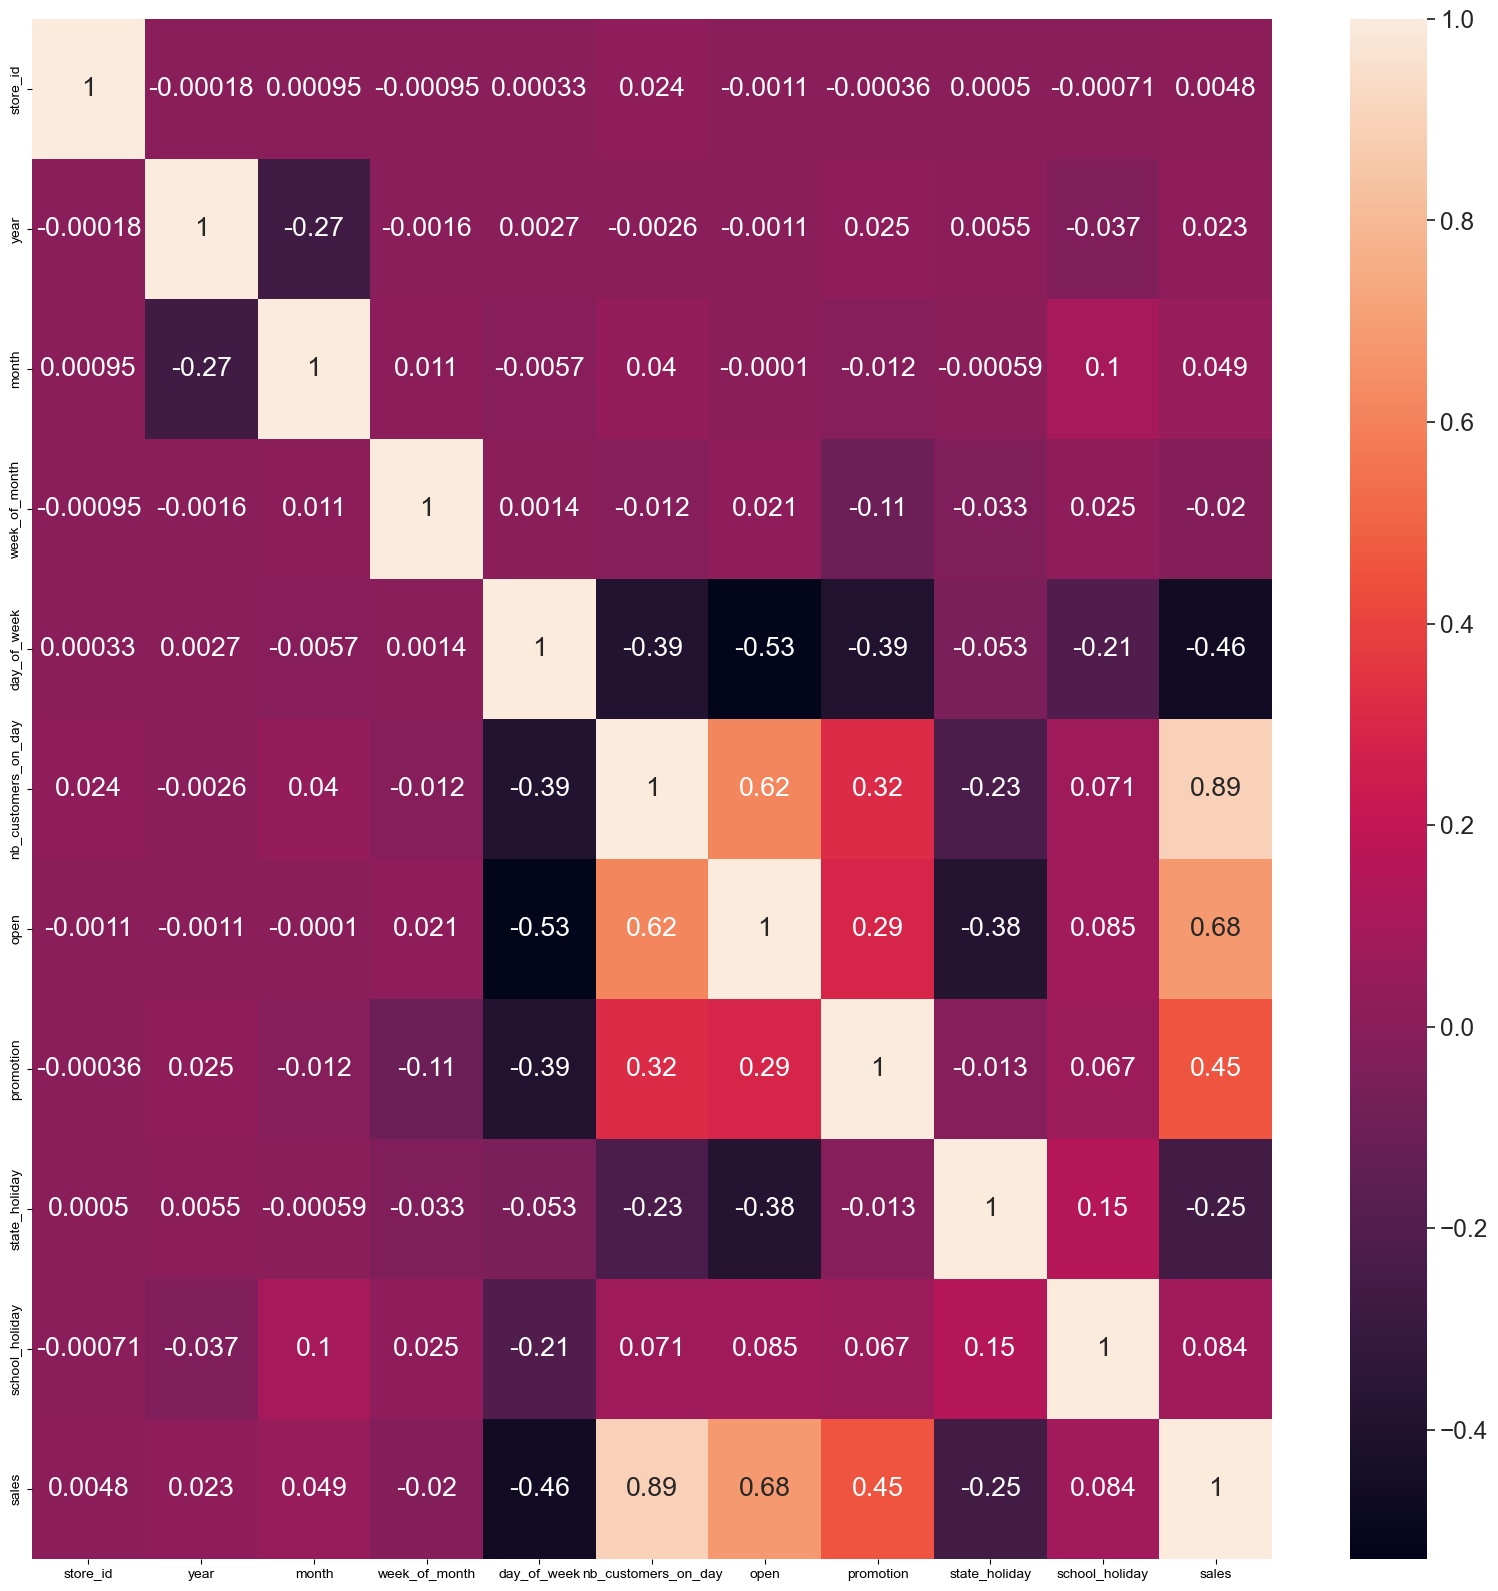

In [12]:
fig, ax = plt.subplots(figsize=(20,20)) # command to make the sizes of the fields bigger 
sns.set(font_scale=1.6)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [13]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


y = df['sales']
X = df.drop(['sales'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

MinMaxtransformer = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(MinMaxtransformer.transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(MinMaxtransformer.transform(X_test),columns=X_test.columns)


lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_train)
print(r2_score(y_train, predictions))
predictions_test = lm.predict(X_test)
print(r2_score(y_test, predictions_test))
mse=mean_squared_error(y_test,predictions_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print(rmse)
print(mse)


0.8546861328072095
0.8532963658172992
1476.1454017723747
2179005.2471737256


In [14]:
pd.DataFrame(predictions)

,0
0,6960.454195
1,4746.404519
2,6137.850716
3,6929.908621
4,218.031507
...,...
512667,3682.126971
512668,6141.403963
512669,73.282816
512670,9293.424049


In [19]:
# # reusing giancarlos code, because its beautiful
# # importing models
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import SGDRegressor
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# # importing evaluation tools for the models
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score, mean_absolute_error
# # creating a list of models
# modellist = [GradientBoostingRegressor(),
#              ElasticNet(),
#              SGDRegressor(),
#              LGBMRegressor(),
#              LinearRegression(),
#              RandomForestRegressor()]

In [20]:
# # defining a function
# def model_test(modellist):
#     for model in modellist:
#         model.fit(X_train,y_train)
        
#         # Training Data
#         # R2-Score
#         predictions = model.predict(X_train)
#         r2score = round(r2_score(y_train, predictions), 2)
#         # Mean Square Error
#         mse= round(mean_squared_error(y_train,predictions))
#         # Root Mean Square Error
#         rmse = round(np.sqrt(mse), 2)
#         # Mean Absolute Error
#         mae = round(mean_absolute_error(y_train, predictions), 2)
        
#         # Test Data
#         # R2-Score
#         predictions = model.predict(X_test)
#         r2scoret = round(r2_score(y_test, predictions), 2)
#         # Mean Square Error
#         mset= round(mean_squared_error(y_test,predictions), 2)
#         # Root Mean Square Error
#         rmset = round(np.sqrt(mset), 2)
#         # Mean Absolute Error
#         maet = round(mean_absolute_error(y_test, predictions), 2)
        
        
#         display(model)
#         display(pd.DataFrame({'ValType': ['Train', 'Test'], 'R2-Score': [r2score, r2scoret], 'MSE': [mse, mset] , 'RMSE': [rmse, rmset], 'MAE': [mae, maet]})) 

In [21]:
# model_test(modellist)

In [22]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9931997823934001
0.9507110940435385


In [23]:
predictions_test = rfr.predict(X_test)
predictions = rfr.predict(X_train)
r2score = r2_score(y_train, predictions)
r2scoret = r2_score(y_test, predictions_test)
mse = mean_squared_error(y_train,predictions)
mset = mean_squared_error(y_test,predictions_test)
rmse = np.sqrt(mse)
rmset = np.sqrt(mset)
display(pd.DataFrame({'ValType': ['Train', 'Test'], 'R2-Score': [r2score, r2scoret], 'MSE': [mse, mset] , 'RMSE': [rmse, rmset]})) 

,ValType,R2-Score,MSE,RMSE
0,Train,0.993200,100829.972487,317.537356
1,Test,0.950711,732093.552453,855.624656


# New Data:

In [72]:
data_new = pd.read_csv('validation_for_students.csv')
data_new

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0
...,...,...,...,...,...,...,...,...,...
71200,712004,217,2,2015-01-13,633,1,1,0,0
71201,712018,604,3,2014-04-30,743,1,1,0,0
71202,712020,1021,5,2014-07-18,1852,1,1,0,1
71203,712023,28,3,2014-08-27,0,0,0,0,1


In [73]:
cols=[]
for c in data_new.columns:
    cols.append(c.lower())
data_new.columns=cols

In [74]:
data_new

,true_index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0
...,...,...,...,...,...,...,...,...,...
71200,712004,217,2,2015-01-13,633,1,1,0,0
71201,712018,604,3,2014-04-30,743,1,1,0,0
71202,712020,1021,5,2014-07-18,1852,1,1,0,1
71203,712023,28,3,2014-08-27,0,0,0,0,1


In [75]:
df_new = data_new.copy()
# df_new = df.drop(df.columns[0], axis=1)
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['year'] = df_new['date'].dt.strftime('%Y')
df_new['month'] = df_new['date'].dt.strftime('%m')
df_new['day'] = df_new['date'].dt.strftime('%d')
df_new['year'] = pd.to_numeric(df_new['year'])
df_new['month'] = pd.to_numeric(df_new['month'])
df_new['day'] = pd.to_numeric(df_new['day'])
df_new['week'] = df_new['date'].dt.isocalendar().week
df_new['month'] = df_new['date'].dt.month
bins = [0, 8, 16, 24, 32]
labels = [1, 2, 3, 4]
df_new['week_of_month'] = pd.cut(df_new['day'], bins=bins, labels=labels)
df_new = df_new.drop(['date','day'],axis=1)
new_column_order = ['store_id', 'year','month','week_of_month', 'day_of_week','nb_customers_on_day','open','promotion','state_holiday','school_holiday']
df_new = df_new.reindex(columns=new_column_order)
df_new['state_holiday'] = df_new['state_holiday'].str.replace(r'a|b|c','1')
df_new = df_new.astype({
        'store_id': int,
        'year': int,
        'month': int,
        'week_of_month': int,
        'day_of_week': int,
        'nb_customers_on_day': int,
        'open': int,
        'promotion': int,
        'state_holiday': int,
        'school_holiday': int})
df_new

C:\Users\Customer\AppData\Local\Temp\ipykernel_24180\551601841.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new['state_holiday'] = df_new['state_holiday'].str.replace(r'a|b|c','1')


,store_id,year,month,week_of_month,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,764,2013,12,4,4,0,0,0,1,1
1,22,2013,5,3,3,449,1,0,0,1
2,1087,2013,6,4,6,622,1,0,0,0
3,139,2013,8,3,6,314,1,0,0,0
4,568,2014,4,1,1,356,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71200,217,2015,1,2,2,633,1,1,0,0
71201,604,2014,4,4,3,743,1,1,0,0
71202,1021,2014,7,3,5,1852,1,1,0,1
71203,28,2014,8,4,3,0,0,0,0,1


In [76]:
df_new_treated = pd.DataFrame(MinMaxtransformer.transform(df_new),columns=df_new.columns)

In [77]:
df_new_treated

,store_id,year,month,week_of_month,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,0.684919,0.0,1.000000,1.000000,0.500000,0.000000,0.0,0.0,1.0,1.0
1,0.018851,0.0,0.363636,0.666667,0.333333,0.082265,1.0,0.0,0.0,1.0
2,0.974865,0.0,0.454545,1.000000,0.833333,0.113961,1.0,0.0,0.0,0.0
3,0.123878,0.0,0.636364,0.666667,0.833333,0.057530,1.0,0.0,0.0,0.0
4,0.508977,0.5,0.272727,0.000000,0.000000,0.065225,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
71200,0.193896,1.0,0.000000,0.333333,0.166667,0.115977,1.0,1.0,0.0,0.0
71201,0.541293,0.5,0.272727,1.000000,0.333333,0.136130,1.0,1.0,0.0,0.0
71202,0.915619,0.5,0.545455,0.666667,0.666667,0.339318,1.0,1.0,0.0,1.0
71203,0.024237,0.5,0.636364,1.000000,0.333333,0.000000,0.0,0.0,0.0,1.0


In [78]:
predictionslm = lm.predict(df_new_treated)
predictionslm = pd.DataFrame(predictionslm)

In [79]:
predictionslm

,0
0,-424.419901
1,4491.866155
2,5158.310424
3,3488.853402
4,4057.034871
...,...
71200,7034.048730
71201,7543.469629
71202,14185.562109
71203,528.567341


In [80]:
predictionsrfr['pred'] = pd.DataFrame(rfr.predict(df_new_treated))

In [84]:
predictionsrfr = predictionsrfr.drop(predictionsrfr.columns[0], axis=1)

In [85]:
predictionsrfr

,pred
0,0.00
1,3601.95
2,6301.68
3,3903.11
4,3877.83
...,...
71200,5981.49
71201,8137.29
71202,16237.69
71203,0.00


In [86]:
datanew = pd.concat([data_new, predictionsrfr], axis = 1)
datanew

,true_index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,pred
0,7,764,4,2013-12-26,0,0,0,c,1,0.00
1,19,22,3,2013-05-22,449,1,0,0,1,3601.95
2,31,1087,6,2013-06-29,622,1,0,0,0,6301.68
3,45,139,6,2013-08-17,314,1,0,0,0,3903.11
4,56,568,1,2014-04-07,356,1,0,0,0,3877.83
...,...,...,...,...,...,...,...,...,...,...
71200,712004,217,2,2015-01-13,633,1,1,0,0,5981.49
71201,712018,604,3,2014-04-30,743,1,1,0,0,8137.29
71202,712020,1021,5,2014-07-18,1852,1,1,0,1,16237.69
71203,712023,28,3,2014-08-27,0,0,0,0,1,0.00


In [87]:
predicts = datanew[['true_index', 'pred']]
predicts

,true_index,pred
0,7,0.00
1,19,3601.95
2,31,6301.68
3,45,3903.11
4,56,3877.83
...,...,...
71200,712004,5981.49
71201,712018,8137.29
71202,712020,16237.69
71203,712023,0.00


In [88]:
predicts.to_csv('predictions.csv', index=False)